In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import corner

def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6

In [2]:
from astropy.cosmology import Planck15 as cosmo
import astropy.units as u
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23

dl = cosmo.luminosity_distance(0.009783).to(u.cm)


In [3]:
from scipy.integrate import quad
def integrand(x, vphot):
    return np.sqrt(1-vphot**2) * 1/(1+vphot*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 
def integral(x): 
    return np.sqrt(1-vphot**2) * 1/(1+vphot*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 


vphot = 0.9
I = quad(integrand, 0, np.pi/2, args=(vphot))
Gamma = ( (1 - vphot**2)**(-1/2) ); #dgamma = ( (1 - vphot**2)**(-3/2) )*dvphot*2*vphot
I, Gamma * (1 - vphot) 

((0.26342438242456534, 2.9245981461541486e-15), 0.22941573387056174)

In [4]:
from scipy.interpolate import interp1d
beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
inter = interp1d(beta, doppler)

def lum_dist_arr(N, vphot, n_days=1.43, dt=0.): #propagate bb to luminosity distance 

    delta = inter(vphot) #1-2/3*11/10*vphot
    corr = delta**4
        
    #Gamma = (1 - vphot**2)**(-1/2)
    #delta = Gamma * (1 - vphot)    
    corr2 = corr#delta**4
        
    #theta = 2*np.sqrt( N*10**(7) /(1-vphot)*corr )#**5)/np.pi ) #regular
    theta = 2*np.sqrt( N / corr2 )#**5)/np.pi ) #inverse

    v = vphot*c 
    t = (n_days-dt) * (3600*24)
    r = v*t
    
    D = r/theta*2# factor of 2 
    D_mpc = D*(3.2408e-23) 
    return D_mpc

'OB1_emcee.pkl'
OB = 'OB1'
pickle_in = open("./GWsGRB170817/data/fit_results/%s_emcee.pkl"%OB,"rb")
emcee_res = pickle.load(pickle_in)
intensity = np.array(u.sr * np.pi *(emcee_res.flatchain['R']/dl)**2)
dl1 = lum_dist_arr(intensity, emcee_res.flatchain['beta'], 
                   n_days = 1.43) #emcee_res.params['t0'].value/24/3600 )
                   #np.array(emcee_res.flatchain['beta']), n_days=1.427) 
    


In [6]:
OB = 'OB2'
pickle_in = open("./GWsGRB170817/data/fit_results/%s_emcee.pkl"%OB,"rb")
emcee_res = pickle.load(pickle_in)

print(emcee_res.params['tauref2'])

intensity = np.array(u.sr * np.pi *(emcee_res.flatchain['R']/dl)**2) 
dl2 = lum_dist_arr(intensity, np.array(emcee_res.flatchain['beta']), 
                   n_days=emcee_res.params['t0'].value/24/3600 )#np.array(emcee_res.flatchain['beta']), n_days=2.42)

print(np.median(dl2), np.median(intensity*1e-7))

<Parameter 'tauref2', value=2.9889193677980974 +/- 1.98, bounds=[0:10]>
43.165044719170155 2.8039459278370955e-29


In [30]:
OB = 'OB3'
pickle_in = open("./GWsGRB170817/data/fit_results/%s_emcee.pkl"%OB,"rb")
emcee_res = pickle.load(pickle_in)

print(emcee_res.params['tauref2'])

intensity = np.array(u.sr* np.pi *(emcee_res.flatchain['R']/dl)**2)
dl3 = lum_dist_arr(intensity, np.array(emcee_res.flatchain['beta']),
                            n_days = emcee_res.params['t0'].value/24/3600)

<Parameter 'tauref2', value=1.9213455843993592 +/- 0.438, bounds=[0:10]>


In [31]:
OB = 'OB4'
pickle_in = open("./GWsGRB170817/data/fit_results/%s_emcee.pkl"%OB,"rb")
emcee_res = pickle.load(pickle_in)

print(dl3)

intensity = np.array(u.sr* np.pi *(emcee_res.flatchain['R']/dl)**2)
dl4 = lum_dist_arr(intensity, np.array(emcee_res.flatchain['beta']),
                            n_days = emcee_res.params['t0'].value/24/3600)

[37.01911002 37.10129312 37.10129312 ... 37.8316268  37.8316268
 37.8316268 ]


(Text(0.5, 0, 'Distance $D_L$'), Text(0, 0.5, '$p(D_L)$'))

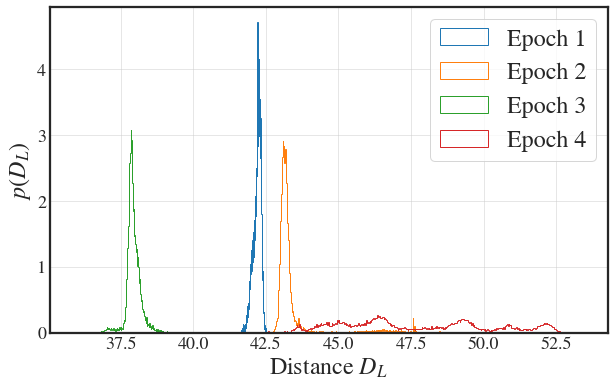

In [32]:
reset_plt(18,24)

plt.figure(figsize=(10,6))
plt.hist(dl1, bins=500, density=True, alpha=1, label='Epoch 1', histtype='step')#, range=(35,70))
plt.hist(dl2, bins=500, density=True, alpha=1, label='Epoch 2', histtype='step')#, range=(35,70))
plt.hist(dl3, bins=500, density=True, alpha=1, label='Epoch 3', histtype='step')#, range=(35,70))
plt.hist(dl4, bins=500, density=True, alpha=1, label='Epoch 4', histtype='step')#, range=(35,70)); 

plt.legend(frameon=True) 
plt.xlabel(r'Distance $D_L$'), plt.ylabel(r'$p(D_L)$')
#plt.savefig('Pictures/Selsing-distance.png', dpi=300)

In [33]:
d1,d1low,d1high = np.median(dl1), np.percentile(dl1, 15.9), np.percentile(dl1, 100-15.9)
#d2,d2low,d2high = np.median(dl2), np.percentile(dl2, 15.9), np.percentile(dl2, 100-15.9)
#d3,d3low,d3high = np.median(dl3), np.percentile(dl3, 15.9), np.percentile(dl3, 100-15.9)
#d4,d4low,d4high = np.median(dl4), np.percentile(dl4, 15.9), np.percentile(dl4, 100-15.9)

In [24]:
d1,d1low,d1high

(42.216386179384415, 42.03883450930732, 42.31630201486409)

In [25]:
plt.figure(figsize=(8,7))
plt.errorbar([1.43, 2.42, 3.41, 4.4], [d1,d2,d3,d4], yerr = [[d1-d1low, d2-d2low, d3-d3low, d4-d4low],
                                                             [d1high-d1,d2high-d2,d3high-d3,d4high-d4]], 
             fmt='.', capsize=5)

plt.axhline(43.8, ls='--', color='k', label='Abbot2017')
plt.fill_between(np.arange(0,6), (36.9)*np.ones(6), (46.7)*np.ones(6), 
                 color='grey', alpha = 0.5)
dd = [d1high-d1low,d2high-d2low,d3high-d3low,d4high-d4low]
d_weight = np.sum( [d1,d2,d3,d4]*1/np.array(dd)**2/np.sum(1/np.array(dd)**2) )
d_unc = np.std([d1,d2,d3,d4])/np.sqrt(4)
plt.axhline(d_weight, ls='--', color='red', label='Inferred Selsing')
plt.fill_between(np.arange(0,6), (d_weight-d_unc)*np.ones(6), (d_weight+d_unc)*np.ones(6), 
                 color='red', alpha = 0.5)
plt.ylim(35,55), plt.xlim(0,5), plt.legend(frameon=True)
plt.xlabel('Days after Merger'), plt.ylabel('Inferred Distance [Mpc]')

#plt.savefig('Pictures/Inferred_Selsing.png', dpi=300)

NameError: name 'd2' is not defined

<Figure size 576x504 with 0 Axes>

In [47]:
vphot_list = []
beta_list = np.linspace(0.0,1,200)
for i in beta_list: 
    vphot = i
    vphot_list.append(quad(integral, 0, np.pi/2)[0])
    
#y = (3*(beta_list-2)*beta_list-)/(2*beta_list**3)

((0.0, 0.3), (-0.001, 0.001))

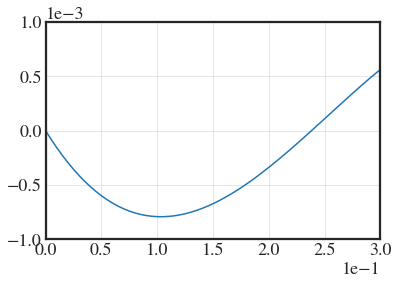

In [24]:
plt.plot( np.linspace(0,1,200), np.array(vphot_list)-(1-2/3*11/10*np.linspace(0,1,200)) )
plt.xlim(0, 0.3), plt.ylim(-1e-3, 1e-3)

((0.0, 1.0), (0.0, 1.0), <matplotlib.legend.Legend at 0x24165da5fd0>)

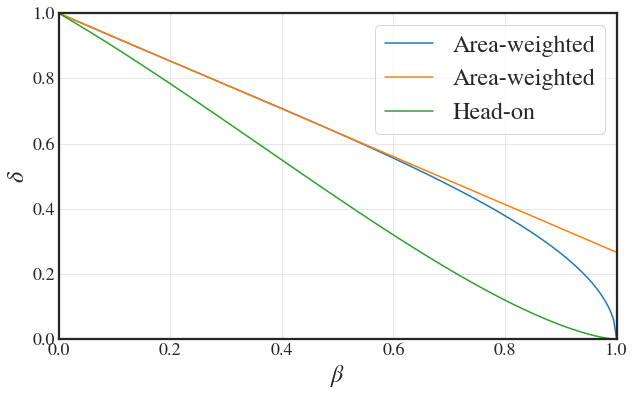

In [15]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,1,200), np.array(vphot_list), label='Area-weighted')
plt.plot(np.linspace(0,1,200), (1-2/3*11/10*np.linspace(0,1,200)), label='Area-weighted')

plt.plot(np.linspace(0,1,200), (1-np.linspace(0,1,200))*np.sqrt(1-np.linspace(0,1,200)**2), label='Head-on' )
plt.xlabel(r'$\beta$'), plt.ylabel(r'$\delta$')
plt.xlim(0,1), plt.ylim(0.,1), plt.legend(frameon=True)
#plt.savefig('Pictures/area_weighted.png', dpi=300)

In [207]:
import lmfit

p = lmfit.Parameters()
OB = 'OB2'
with open("./data/%s_init_no_gaussian_low_v.json"%OB, 'r') as infile:
    p.load(infile)
p

name,value,initial value,min,max,vary
T,3961.01170,3965,2500.00000,7500.00000,True
N,8.2193e-30,8.21e-30,-inf,inf,True
vphot,0.19812954,0.2039,0.00000000,1.00000000,True
vmax,0.25547857,0.2575,0.00000000,1.00000000,True
t0,212400.000,212400,-inf,inf,False
tau,0.66231312,0.76,0.00000000,10.0000000,True
vref,0.00000000,0.0,0.00000000,1.00000000,False
ve,0.45916769,0.46,0.00000000,1.00000000,True
occult,2.16595485,1.977,0.10000000,10.0000000,True
amp1,0.71000000,0.71,0.01000000,5.00000000,False
